## classification dengan KNN

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.

- prediksi yang dilakukan dapat diterapkan pada classification regresion task


### Sample Dataset

In [56]:
import pandas as pd

sensus = {
    'tinggi':[158,170,183,191,155,163,183,158,178],
    'berat' : [64,86,84,80,49,59,67,54,67],
    'jk': ['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,183,67,wanita
7,158,54,wanita
8,178,67,wanita


### Visualisasi Data

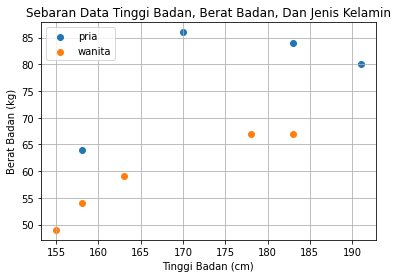

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, Dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

### Preprocessing Dataset

In [58]:
import numpy as np

X_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])
y_train

array(['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita',
       'wanita', 'wanita'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = y_train.flatten()
y_train


array([0, 0, 0, 0, 1, 1, 1, 1, 1])

### Training KNN Classification Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Prediksi Jenis Kelamin

In [61]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan,berat_badan]).reshape(1,-1)
X_new

array([[155,  70]])

In [62]:
y_new = model.predict(X_new)
y_new

array([1])

### Visualisasi Nearest Neighbours

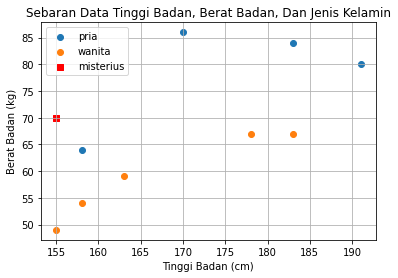

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'],d['berat'], label=jk)

plt.scatter(
    tinggi_badan,
    berat_badan,
    marker='s',
    color='red',
    label='misterius'
)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, Dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [64]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

### Euclidient Distance

- digunakan untuk kalkulasi jarak


![Euclidient_Distance](img/eucli.png)

In [65]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [66]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [183,  67],
       [158,  54],
       [178,  67]])

In [67]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius,d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 28.160255680657446,
 16.278820596099706,
 23.194827009486403]

In [68]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,183,67,wanita,28.160256
2,183,84,pria,31.304952
3,191,80,pria,37.363083
